# Decision Tree (의사결정나무)

- 데이터를 분류하거나 회귀하기 위해 조건 분할을 반복하여 트리를 형성하는 모델
- Rood Data -> 조건식을 이용하여 참/거짓 데이터를 반복적으로 분할 -> Leaf node로 내려가면서 최종 예측
- 사람이 해석하기 쉬운 모델. 부스팅 계열이나 랜덤포레스트에서 기본 학습기로 활용 
- feature 기준으로 데이터를 분할
- 불순도 
    - 분류: 지니 계수, 엔트로피, 로그 손실
    - 회귀: 분산 감소, MSE, MAE
- 매개변수
    - criterion
        - 분류
            - 기본값: gini
            - 불순도의 계산 방법
                - entropy : 성능 향상, 속도 느려짐
                - log_loss : 확률적 분류
        - 회귀
            - 기본값: squared_error
            - 불순도의 오차를 기준으로 볼 것인가 분산을 기준으로 볼 것인가
                - squared_error : 평균 제곱 오차
                - absolute_error : 평균 절대 오차
                - friedman_mes : 분산 감소 기반
    - spliter
        - 기본값 : best
        - 분할 시 특징 선택 방식
        - best
            - 가장 좋은 feature 선택
        - random
            - 무작위 feature 선택(앙상블에서 모델의 다양성)
    - max_depth
        - 기본값 : None
        - 트리의 최대 깊이 제한
        - None인 경우에는 Leaf까지 계속 분할 -> 과적합 위험
    - min_samples_split
        - 기본값 : 2
        - node를 분할하기위한 최소한의 샘플의 개수 지정
    - min_samples_leaf
        - 기본값 : 1
        - Leaf 노드가 되기 위한 최소 샘플 수
    - max_feature
        - 기본값 : None
        - 최적으로 분할 시 고려할 feature의 개수
        - None
            - 모든 feature 사용
        - sqrt
            - feature의 수에 루트를 입혀서 사용
        - log2
            - feature의 수에 loa2를 입혀서 사용
        - 숫자의 형태로 고정된 값을 사용
    - min_impurity_decrease
        - 기본값: 0.0
        - 불순도 감소량이 해당 매개변수의 인자값 이상일 때만 데이터 분할 수행
    - ccp_alpha 
        - 기본값 : 0.0
        - 비용-복잡도. 가지치기 매개변수

- 속성
    - tree_
        - 트리 구조에 대한 상세 객체
    - classes_
        - 분류 문제에서 클래스 목록 
    - n_classes_
        - 클래스의 개수
    - n_features_in
        - 입력되는 데이터의 피쳐 개수
    - feature_importances_
        - 각 feature들의 중요도 (합은 1고정)

- 메서드
    - fit(x, y)
        - 모델의 학습
    - predict(x)
        - 예측값 생성
    - predict_proba(x)
        - 분류모델에서 사용
        - 각 클래스별 예측 확률
    - score(x, y)
        - 분류에서는 정확도
        - 회귀에서는 R2-score
    - export_graphviz
        - 트리구조를 시각화

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd

In [4]:
iris = pd.read_csv("../data_git/data/iris.csv")
iris.head(1)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa


In [5]:
target_list = iris['target'].unique()

In [6]:
for i, target in enumerate(target_list):
    iris['target'] = iris['target'].replace(target, i)

/var/folders/v0/r6b3g15j6gd1x8947g8ly2qr0000gn/T/ipykernel_44516/2598432022.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris['target'] = iris['target'].replace(target, i)


In [7]:
iris['target'].unique()

array([0, 1, 2])

[Text(0.375, 0.875, 'petal length <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = Iris-setosa'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = Iris-setosa'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'petal width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = Iris-versicolor'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'petal length <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = Iris-versicolor'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = Iris-versicolor'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Iris-virginica'),
 Text(0.75, 0.375, 'petal length <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = Iris-virginica'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = Iris-virginica'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]\nclass = Iris-virginica')]

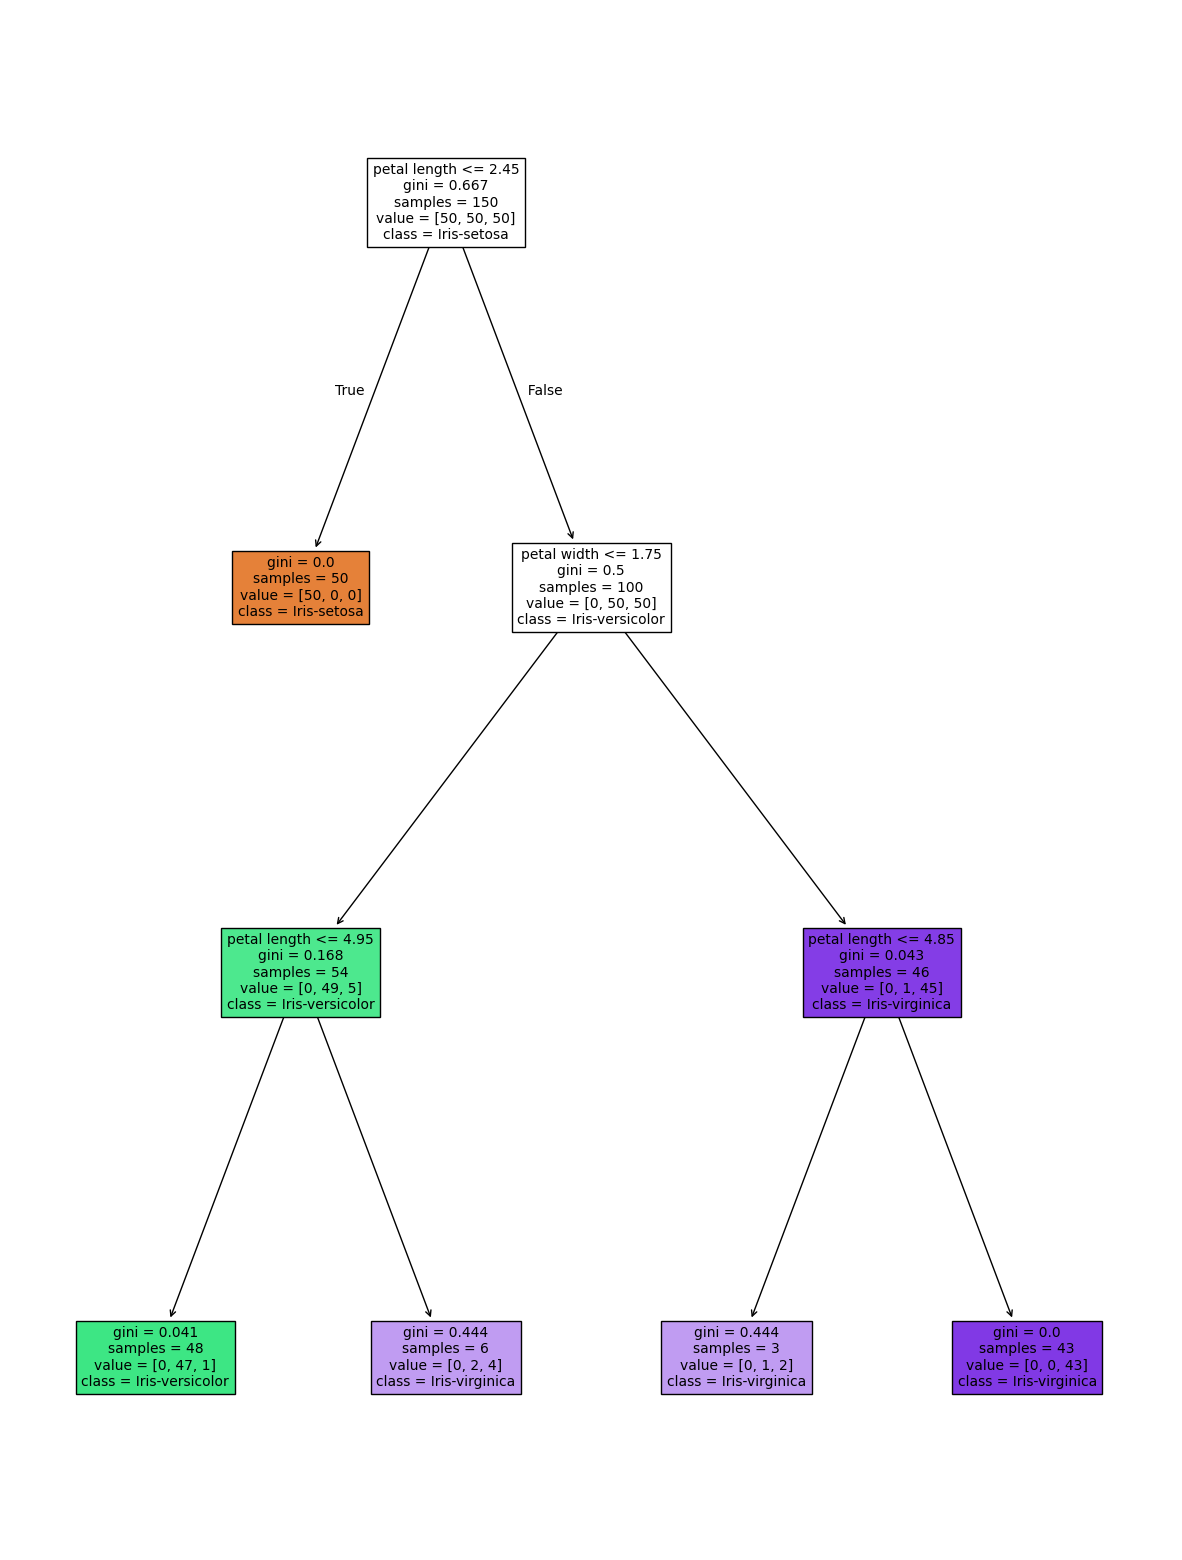

In [8]:
# 독립 변수, 종속 변수
x = iris.drop('target', axis=1).values
y = iris['target'].values

# 모델을 생성
clf = DecisionTreeClassifier(max_depth = 3, random_state=42)
# 모델 학습
clf.fit(x, y)
feature_names = iris.drop('target', axis=1).columns

# 트리구조를 시각화
plt.figure(figsize = (15, 20))
plot_tree(
    clf, 
    feature_names = feature_names,  # feature 이름을 지정
    class_names = target_list,  # 분류의 class의 이름을 지정
    fontsize=10,
    filled = True   # 노드의 색상 표시
)

# 부스팅
- 모델을 순차적으로 학습
- 이전 모델이 잘못 맞춘 데이터에 가중치 증가 -> 다음 모델에서 집중 학습
- 단순 모델을 합쳐서 강한 모델로 생성
- 장점
    - 편향 감소 -> 예측의 확률이 올라간다.
    - 단순한 모델을 조합하여 높은 성능 가진 모델
- 단점
    - 순차적으로 학습 -> 병렬화 어려운 -> 학습 속도가 느려짐
    - 학습의 횟수가 너무 많은 경우 -> 과적합 위험
    - 파라미터 튜닝 중요
- 대표 알고리즘
    - AdaBoost
        - 오차가 큰 샘플에 더 높은 가중치 부여
        - 각각의 모델들은 가중치가 조정된 데이터셋을 이용하여 학습
        - 최종모델에서는 가중치의 합산으로 결정
    - Gradient Boosting(GBM)
        - 이전 모델의 잔차를 예측하는 새로운 모델을 추가
        - 손실 함수를 직접 최적화
        - 계산량이 많음
    - XGBoost
        - GBM을 개선한 알고리즘
        - 규제, 병렬 학습 지원 -> 병렬지원을 통해 시간이 감소, 규제를 통해 과적합 방지
        - 대표적인 부스팅 알고리즘
    - LightGBM
        - XGBoost에 비해 속도가 우수
        - Histogram 기반 학습을 통해서 대용량 데이터의 처리에 최적화
    - CatBoost
        - 범주형 변수들을 자동 처리
        - 비교적인 튜닝이 간단

# AdaBoost(분류)
- 초기에는 모든 샘플의 가중치를 동일하게 부여
- 첫번째 모델에서는 약한 모델을 학습 -> 잘못 분류한 샘플에 대해서 가중치를 증가
- 가중치가 증가된 데이터를 이용하여 다음 모델에서 학습하여 더 잘 맞추도록 집중 학습
- 이렇게 만들어진 여러 모델의 가중치의 합(분류)/평균(회귀)으로 최종 예측

- 매개변수
    - 분류
        - estimator (base_estimator -> sklearn 구버전의 매개변수명)
            - 기본값: DecisionTreeClassifier(max_depth=1)
            - 모델의 선택
                - DecisinTreeClassifier() : 매개변수의 값들을 바꿔서 사용 가능 -> 의사결정나무
                - LogisticRegression() : 선형 분류 모델
                - SVC(probability = True) : 확률 예측을 True로 변경해야 사용 가능
        - n_estimator
            - 기본값 : 50
            - 모델의 개수
                - 개수가 많아지면 시간이 증가, 과적합 위험
        - learning_rate
            - 기본값 : 1.0
            - 각 단계별 기여도(가중치)
            - n_estimator와 상호 보완적(rate를 작게하면 모델의 개수를 증가)
            - 약한 모델의 기여도를 조절하는 스케일링 값
            - 값이 작은 경우에는 각 단계에서 영향이 줄어듬 -> 더 많은 모델이 필요

            - 데이터의 크기/복잡도 클수록 모델의 개수를 늘리고 기여도를 줄여주는 것이 유리
            - 작은 데이터셋이면 모델의 개수를 줄이고 기여도를 증가시키는 것이 유리

        - algorithm
            - 기본값 : SAMME.R
            - SAMME.R : 확률을 사용, 보통 시간이 빠르고 성능이 우수
            - SAMME : 클래스별 점수를 기반 (확률이 필요 없음)
- 속성
    - estimators_
        - 학습된 모델의 리스트
    - estimators_weights_
        - 각 단계별 모델의 가중치(분류에서 중요)
    - estimatores_errors_
        - 각 단계별 오차율
    - features_infortanses_
        - feature 별 중요도 (가중치의 합)
- 메서드
    - decision_function(x)
        - 결정 함수의 값
    - staged_predict(x) / staged_predict_proba(x)
        - 각 단계별 누적 모델의 예측을 순차적으로 제공
    

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [10]:
# bodyperformance 데이터를 로드
body = pd.read_csv("../data_git/data/bodyPerformance.csv")

In [11]:
body.head(1)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C


In [13]:
body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [14]:
# Object 형 데이터를 수치형 데이터로 변환
# gender 컬럼의 M은 0 , F는 1로 변환
# numpy의 where 함수를 이용하여 변환
# np.where(조건식, 참안 경우 데이터, 거짓인 경우 데이터)
body['gender'] = np.where(body['gender'] == 'M', 0, 1)

body['gender'].value_counts()

gender
0    8467
1    4926
Name: count, dtype: int64

In [15]:
# class 컬럼의 데이터는 A는 0, B는 1, C는 2, D는 3 변환
body['class'] = body['class'].map(
    {
        'A' : 0,
        'B' : 1,
        'C' : 2,
        'D' : 3   
    }
)

In [17]:
body['class'].value_counts() 

class
2    3349
3    3349
0    3348
1    3347
Name: count, dtype: int64

In [21]:
# 독립 변수의 데이터와 종속 데이터로 나눠준다.
x = body.drop('class', axis = 1).values
y = body['class'].values
# 독립 변수들의 컬러의 이름들만 따로 저장)((feature_infortance 확인할 떄 사용))
feature_names = body.columns.difference(['class'])

In [27]:
# train test 데이터 분할 8#@
# y의 값들의 계수가 
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y,
    test_size=0.2, random_state=42,
    stratify = y
)

In [28]:
# AdaBoost를 기본값으로 사용하여 생성
clf = AdaBoostClassifier()
# train 데이터를 이용해 학습
clf.fit(X_train, Y_train)
print('정확도 : ', clf.score(X_test, Y_test))

정확도 :  0.545726017170586


In [39]:
clf2 = AdaBoostClassifier(
    estimator = DecisionTreeClassifier(max_depth = 4), 
    n_estimators=500, learning_rate=0.1
)
clf2.fit(X_train, Y_train)
print('정확도 : ', clf2.score(X_test, Y_test))

정확도 :  0.7013811123553565


In [40]:
pred = clf2.predict(X_test)

In [43]:
# 분류분석의 평가

# 혼동행렬
cm = confusion_matrix(pred, Y_test)
acc = accuracy_score(pred, Y_test)
prc = precision_score(pred, Y_test, average = 'micro')
rcll = recall_score(pred, Y_test, average = 'micro')
f1 = f1_score(pred, Y_test, average = 'micro')
# 다중 클래스 분류에서는 정밀도, 재현율, f1score는 average 매개변수에 인자를 설정
# micro : 전체의 TP/FP/FN 합쳐서 계산(클래스의 불균형 둔감, 전체 정확도 비슷)
# macro : 클래스별 평균(가중치 동일) -> 클래스 불균형 민감
# weighted : 각 클래스별 샘플의 수로 가중 평균 -> 클래스 불균형 적합

print(cm)
print("정확도 : ", round(acc, 2))
print("정밀도 : ", round(prc, 2))
print("재현율 : ", round(rcll, 2))
print("f1 : ", round(f1, 2))

[[513 142  60  11]
 [155 426 163  50]
 [  2  88 411  80]
 [  0  13  36 529]]
정확도 :  0.7
정밀도 :  0.7
재현율 :  0.7
f1 :  0.7


In [76]:
# feature 별 중요도 확인
importances = clf2.feature_importances_
# feature_names 를 이용하여 df 생성
feature_name_df = pd.DataFrame(feature_names)
# feature_name_df와 importances 결합하여 하나의 데이터프레임을 생성
feature_df = pd.concat([feature_name_df, pd.DataFrame(importances)], axis=1)
feature_df.columns = ['feature_name', 'importance']
feature_df.sort_values('importance', ascending = False)

,feature_name,importance
8,sit-ups counts,0.457499
9,systolic,0.186986
0,age,0.136062
4,gender,0.062432
3,diastolic,0.050972
7,sit and bend forward_cm,0.048564
1,body fat_%,0.029951
10,weight_kg,0.020513
2,broad jump_cm,0.004657
5,gripForce,0.001211


## AdaBoost(회귀)
- 여러 개의 약한 회귀 모델을 순차적으로 학습하여 이전 단계의 오차를 줄이도록 가중치를 조절하여 높은 성능의 회귀 모델을 생성
- 매개변수
    - estimator
        - 기본값 : DecisionTreeRegressior(max_depth = 3)
        - DecisionTreeRegressor() : 매개변수들을 변경하여 사용이 가능
        - LinearRegressor() : 선형 회귀 모델
        - Ridge()
        - SVR()
    - n_estimator
        - 기본값 : 50
        - 모델의 생성 개수
    - learning_rate
        - 기본값 : 1.0
        - 각 모델당 기여도
    - loss
        - 기본값 : linear
        - 오차에 대한 가중치의 변환 방식을 지정
        - linear -> 기본적인 선형 업데이트
        - square -> 큰 오차에 더 민감
        - exponential -> 매우 큰 오차에 더 강하게 패널티
- 속성
    - estimators_
        - 약한 모델의 리스트
    - estimators_weights_
        - 각 단계별 모델의 가중치
    - estimators_errors_
        - 각 단계별 모델의 훈련에서 오차 (평균 절대/ 평균 제곱은 내부의 설정에 따라 지표 생성)

In [77]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [78]:
# 데이터 로드
car = pd.read_csv("../data_git/data/CarPrice_Assignment.csv")

In [88]:
# car 데이터프레임에서 dtype이 숫자인 컬럼들만 필터
# 방법1
col_list = []
for col in car.columns:
    if car[col].dtype in ["float64", "int64"]:
        col_list.append(col)

col_list

car[col_list]

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [91]:
# car 데이터프레임에서 dtype이 숫자인 컬럼들만 필터
# 방법2
car_num = car.select_dtypes('number')

# 특정 컬럼을 제외
feature_names = car_num.columns.difference(['car_ID', 'symboling', 'price'])

x = car_num[feature_names].values
y = car_num['price'].values
x

array([[3.470e+00, 4.880e+01, 1.688e+02, ..., 5.000e+03, 2.680e+00,
        8.860e+01],
       [3.470e+00, 4.880e+01, 1.688e+02, ..., 5.000e+03, 2.680e+00,
        8.860e+01],
       [2.680e+00, 5.240e+01, 1.712e+02, ..., 5.000e+03, 3.470e+00,
        9.450e+01],
       ...,
       [3.580e+00, 5.550e+01, 1.888e+02, ..., 5.500e+03, 2.870e+00,
        1.091e+02],
       [3.010e+00, 5.550e+01, 1.888e+02, ..., 4.800e+03, 3.400e+00,
        1.091e+02],
       [3.780e+00, 5.550e+01, 1.888e+02, ..., 5.400e+03, 3.150e+00,
        1.091e+02]], shape=(205, 13))

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y,
    test_size=0.3, random_state=42
)

In [115]:
# 모델을 생성 기본값
reg = AdaBoostRegressor()
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)

# 평가
mse = mean_squared_error(pred, Y_test)
mae = mean_absolute_error(pred, Y_test)
rmse = np.sqrt(mse)
r2 = r2_score(pred, Y_test)

print('MSE : ', round(mse, 2))
print('MAE : ', round(mae, 2))
print('RMSE : ', round(rmse, 2))
print('r2 : ', round(r2, 2))

MSE :  6586209.27
MAE :  1985.7
RMSE :  2566.36
r2 :  0.9


In [116]:
Y_test[0]

np.float64(30760.0)

In [123]:
# 각 단계별 중간 예측
pred_list = []
for _pred in list(reg.staged_predict(X_test)):
    # mae = mean_absolute_error(_pred, Y_test)
    # print(mae)
    pred_list.append(mean_absolute_error(_pred, Y_test))


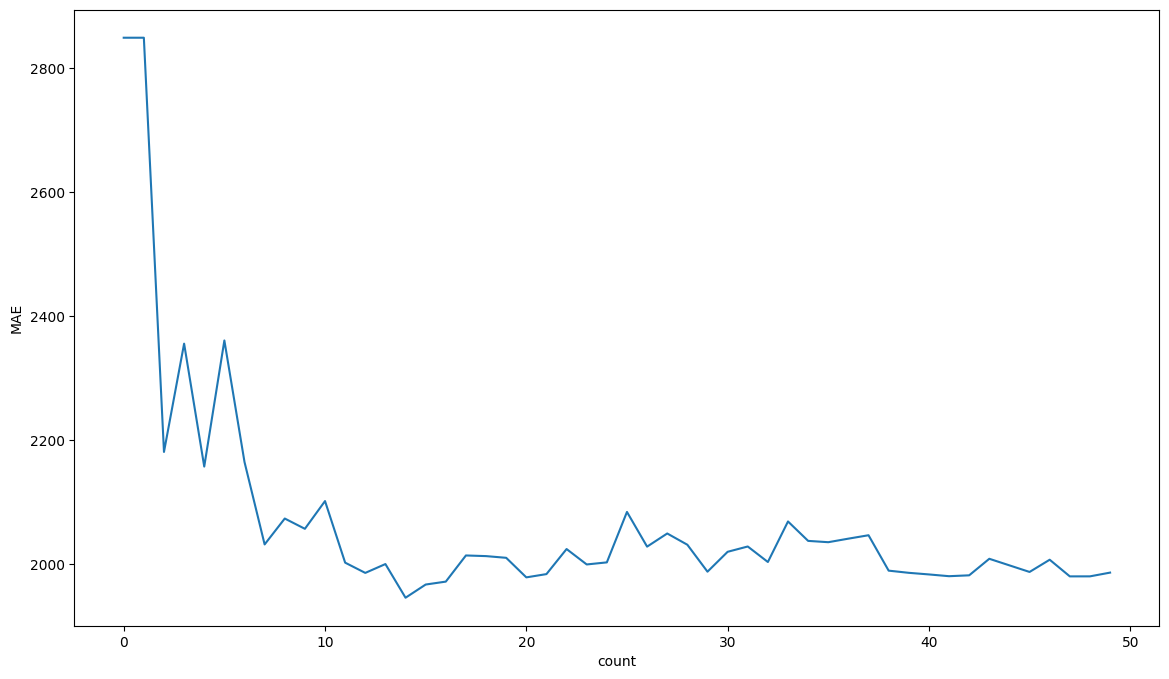

In [124]:
# 평균 오차율을 시각화
plt.figure(figsize = (14, 8))
plt.plot(pred_list)
plt.xlabel('count')
plt.ylabel('MAE')
plt.show()

In [126]:
# 각 피쳐별 중요도 
importances = reg.feature_importances_
feature_name_df = pd.DataFrame(feature_names, columns = ['feature_name'])
feature_name_df['importance'] = importances
feature_name_df

,feature_name,importance
0,boreratio,0.024241
1,carheight,0.003985
2,carlength,0.040875
3,carwidth,0.076782
4,citympg,0.037369
5,compressionratio,0.008758
6,curbweight,0.108747
7,enginesize,0.556200
8,highwaympg,0.038073
9,horsepower,0.079019


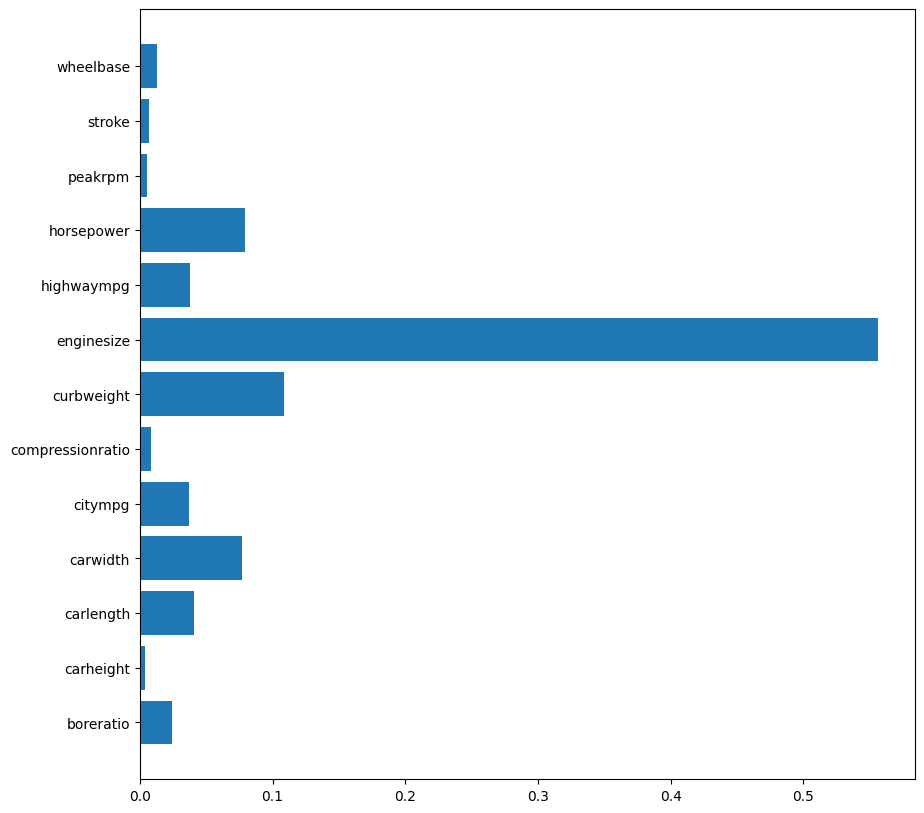

In [128]:
# 피쳐별 중요도 막대 그래프 -> 누운 막대그래프
plt.figure(figsize = (10, 10))
plt.barh(feature_name_df['feature_name'], feature_name_df['importance'])
plt.show()